# Heart Disease Project

 Project: Build a classification model with Logistic Regression to predict whether a person has heart disease or not. The prediction is based on medical attributes. The model is developed and evaluated using the [Heart Disease Dataset on Kaggle](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)
 from Kaggle.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
)

In [2]:
df = pd.read_csv('data/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


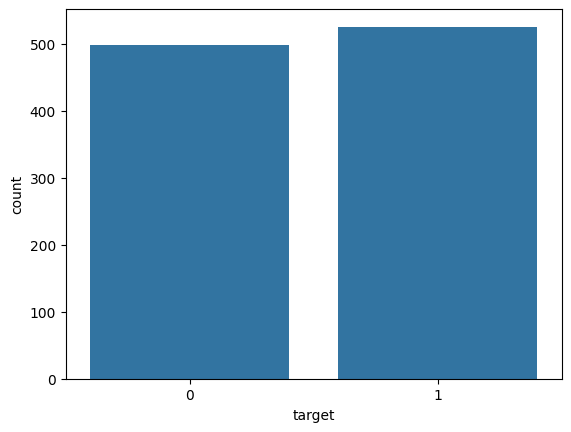

In [ ]:
sns.countplot(x='target', data=df)
plt.show()


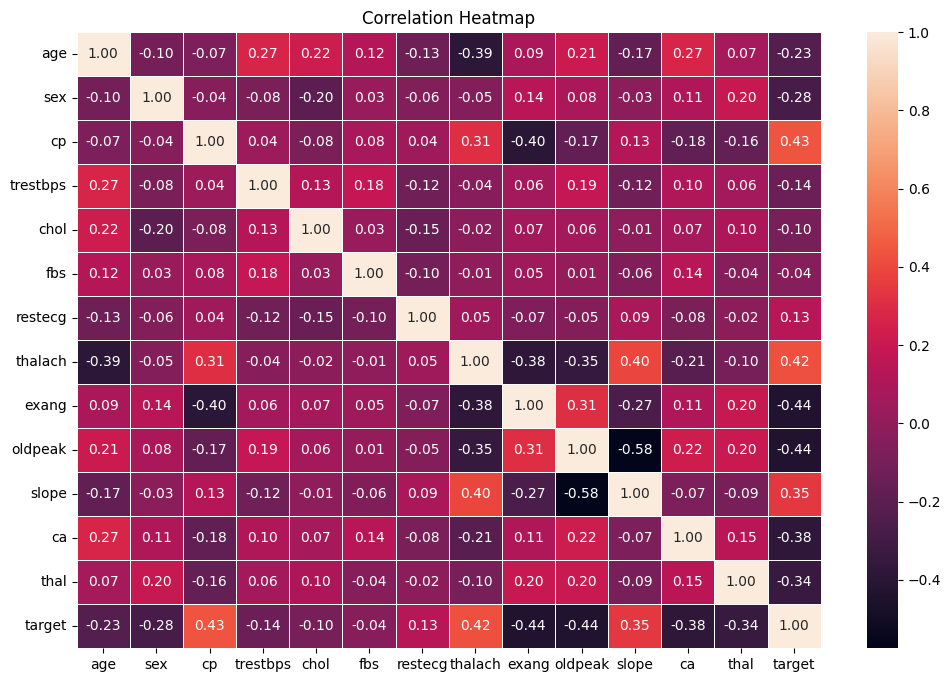

In [ ]:
# to understand feature-to-feature interactions and feature-to-target connections.
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Selecting features with high correlation for the new DataFrame
high_corr_features = ['cp', 'thalach', 'slope','oldpeak', 'exang', 'ca', 'thal']

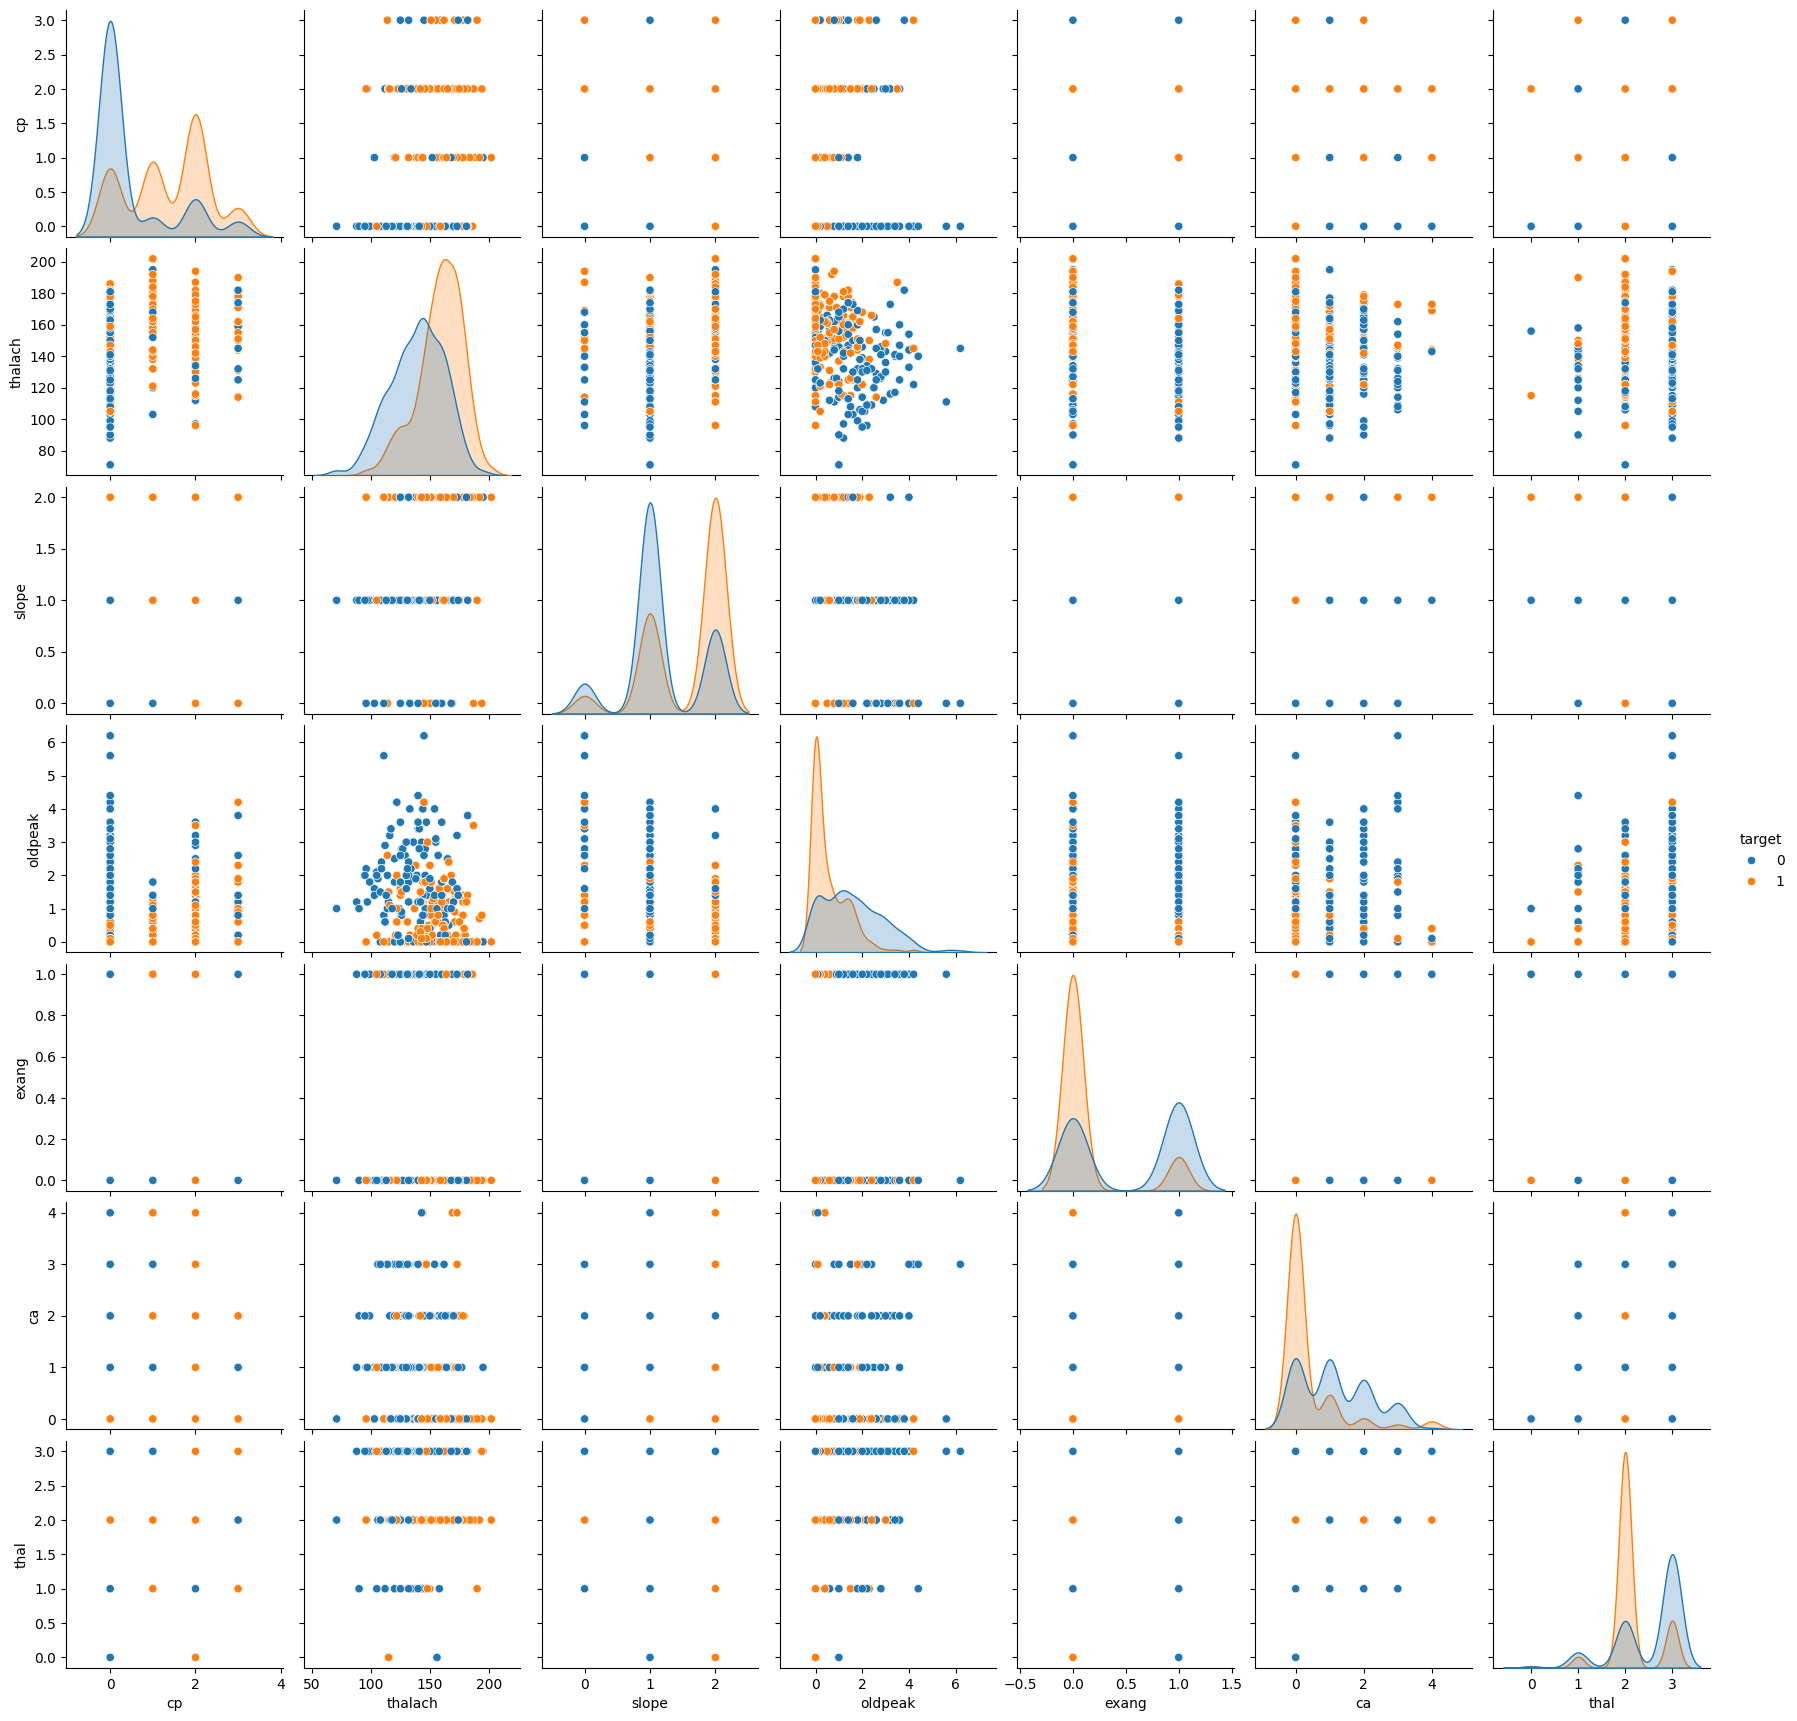

In [ ]:
df_pair = df[high_corr_features + ['target']]  

sns.pairplot(df_pair, hue='target')
plt.show()


## Supervised Learning
### Feature Selection | Features Scaling | Data Split |  Model Training

#### Feature Selection

In [ ]:
x = df[high_corr_features]
y = df['target']

#### Features Scaling

In [11]:
scal = StandardScaler()

In [12]:
x_scal = scal.fit_transform(x)

In [13]:
pd.DataFrame(x_scal, columns=x.columns).head()

,cp,thalach,slope,oldpeak,exang,ca,thal
0,-0.915755,0.821321,0.995433,-0.060888,-0.712287,1.209221,1.089852
1,-0.915755,0.255968,-2.243675,1.727137,1.403928,-0.731971,1.089852
2,-0.915755,-1.048692,-2.243675,1.301417,1.403928,-0.731971,1.089852
3,-0.915755,0.516900,0.995433,-0.912329,-0.712287,0.238625,1.089852
4,-0.915755,-1.874977,-0.624121,0.705408,-0.712287,2.179817,-0.522122


#### Data Split

In [14]:
x_train, x_test, y_train, y_test = train_test_split( x_scal, y, test_size=0.2, random_state=0)

In [29]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (820, 7)
y_train shape: (820,)
x_test shape: (205, 7)
y_test shape: (205,)


#### Model Training

In [16]:
model = LogisticRegression()

In [17]:
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Model Prediction

In [18]:
y_pred = model.predict(x_test)

### Model Evaluation

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8780


### Classifiction Report

In [ ]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        98
           1       0.87      0.91      0.89       107

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



## Creating a New Sample for Inference

In [ ]:
# Example input 
new_values = [[1, 150, 3, 2.3, 0, 0, 6]]

# Match training column names to avoid scaler/model mismatches and warnings
columns = x.columns 
new_data = pd.DataFrame(new_values, columns=columns)

In [22]:
new_data_scaled = scal.transform(new_data)

In [23]:
probability  = model.predict_proba(new_data_scaled)
probability 

array([[0.95445248, 0.04554752]])

In [24]:
prediction = model.predict(new_data_scaled)

if prediction == 0:
    print('No Heart Disease')
else:
    print('The Person Has Hart Disease')

No Heart Disease
